# Error Probabilities and Mutual Information

## MAP and ML Detection

The most important task at the receiver is the data detection based on the received symbols. The detection can be performed according to different criteria. In the following derivation, we assume that the 1st Nyquist criterion is fulfilled (no intersymbol interference) and that only white Gaussian noise disturbs the transmission. Under these assumptions, the received symbol at an arbitrary time instance becomes

\begin{equation}
    y = x + w \; .
\end{equation}

The Maximum A Posteriori (MAP) detector maximizes the a posteori probability $\Pr\{ \tilde{x} \mid y \}$. Using the rule of Bayes, it can be expressed by

\begin{equation}
    \Pr\{ \tilde{x} \mid y \} = p(y \mid \tilde{x}) \cdot \frac{\Pr\{ \tilde{x}\}}{p(y)}
\end{equation}

leading the for following formulation of the MAP detector.

\begin{equation}
    \hat{x}^{\mathsf{MAP}}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Pr\{ \tilde{x} \mid y \}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Big[ p(y \mid \tilde{x}) \cdot \Pr\{ \tilde{x}\} \Big] 
\end{equation}

We see that it depends on the likelihood function $p(y \mid \tilde{x})$ as well as the data symbols' a priori probabilities $\Pr\{ \tilde{x}\}$. The MAP detector optimally balances the significance of the observation $y$ and the a priori knowledge and determines the most probable transmit symbol.

If all $M$ data symbols are equally likely, the a priori probability $\Pr \{ x \} = \frac{1}{M}$ becomes a contant term and can be skipped. This leads to the maximum likelihood detector

\begin{equation}
    \hat{x}^{\mathsf{ML}} = \arg \! \max_{\tilde{x} \in \mathbb{X}} p(y \mid \tilde{x}) \; .
\end{equation}

Die Likelihood-Funktion gibt die Wahrscheinlichkeitsdichte von $y$ bei gegebenem $\tilde{x}$ an und stellt daher für $\tilde{x}=x$ die Verteilung des Rauschens dar.

The above expressions for MAP and ML detection can be further rewritten for the assumption of an AWGN channel (additive white Gaussian noise). Without loss of generality, the natural logarithm can be applied because it is a monotonically increasing function and does not change the position of the maximum. We obtain

\begin{align*}
    \hat{x}^{\mathsf{MAP}}
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[ \log p(y \mid \tilde{x}) + \log \Pr\{ \tilde{x}\} \Big]
     = \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[- \frac{|y - \tilde{x}|^2}{\sigma_{\cal N}^2} 
         + \log \Pr\{ \tilde{x}\} \Big] \\
     &= \arg \! \min_{\tilde{x} \in \mathbb{X}} 
        \Big[|y - \tilde{x}|^2 -\sigma_{\cal W}^2 \cdot \log \Pr\{ \tilde{x}\} \Big] \\
    \hat{x}^{\mathsf{ML}} 
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} \log p(y \mid \tilde{x})
     = \arg \! \min_{\tilde{x} \in \mathbb{X}} |y - \tilde{x}|^2 \; .
\end{align*}

For Gaussian noise, the ML detector searches for the data symbol with the smallest Euclidean distance to the received symbol $y$. The MAP detector extends the ML expression by the a priori probabilities of the hypotheses $\tilde{x}$. In the low SNR regime is the noise very strong (large variance $\sigma_{\cal W}^2$) and the prior knowledge dominates the detection. This is meaningful because the received value $y$ is very unreliable. In the high SNR regime, $\sigma_{\cal W}^2$ is small and the received symbol $y$ is trustful and dominates the decision.


## Symbol Error Probabilities

A detection error occurs if the detector decides in favor to a wrong symbol, i.e. $\hat{x} \neq x$. This happens for Gaussian noise and ML detection when the competing symbol $\tilde{x} \neq x$ is closer to $y$ than the true symbol $x$. The probability for this event is called pairweise error probability and depends on the SNR and the modulation scheme. Its computation requires the integration of the likelihood function over a particular interval. Unfortunately, the Gaussian distribution cannot be integrated in closed form and numerical solutions have to be used. The are represented by the Gaussian error function $\mathrm{erf}(x)$ and its complement $\mathrm{erfc}(x)=1-\mathrm{erf}(x)$. They are defined by 

\begin{align*}
    \mathrm{erf}(x) &= \frac{2}{\sqrt{\pi}} \cdot \int_0^x e^{- \xi^2} \ d\xi \\
    \mathrm{erfc}(x) &= 1 - \mathrm{erf}(x)
    = \frac{2}{\sqrt{\pi}} \cdot \int_x^{\infty} e^{- \xi^2} \ d\xi .
\end{align*}

and depicted in the diagram below.

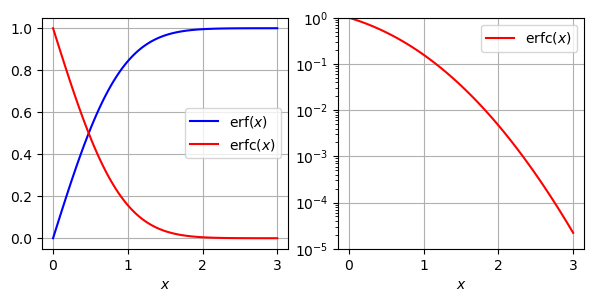

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc

x = np.linspace(0,3,101)
ferf = erf(x)
ferfc = erfc(x)

fig1 = plt.figure(figsize=(7,3))
ax1a = fig1.add_subplot(121)
ax1a.plot(x, ferf, 'b-',label='$\mathrm{erf}(x)$')
ax1a.plot(x, ferfc, 'r-',label='$\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

ax1b = fig1.add_subplot(122)
ax1b.semilogy(x, ferfc, 'r-',label='$\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.ylim(1e-5,1)
plt.grid(True)
plt.legend()

The symbol error probabilities for different linear modulation schemes depend on the SNR and the minimum squared Euclidean distance $\Delta_0^2$ of the signal alphabet. The latter is usually normalized on the average transmit power $\sigma_{\cal X}^2.

\begin{equation}
    \Delta_0^2 = \min_{x,\tilde{x} \in \mathbb{X} \atop x \neq \tilde{x}} 
        \frac{|x - \tilde{x}|^2}{\sigma_{\cal X}^2}
\end{equation}

We obtain the following expressions for ASK, PSK and QAM.

\begin{align*}
    P_{\mathrm{s}}^{M-\mathsf{ASK}} 
    &= \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{M^2-1} \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{QAM}} 
    &\approx 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{2(M-1)} \frac{E_{\mathrm{s}}}{N_0} } \right) 
    = 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{PSK}} 
    &\approx \mathrm{erfc} \left( \sqrt{ \sin^2 \left( \frac{\pi}{M} \right) \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right)
\end{align*}

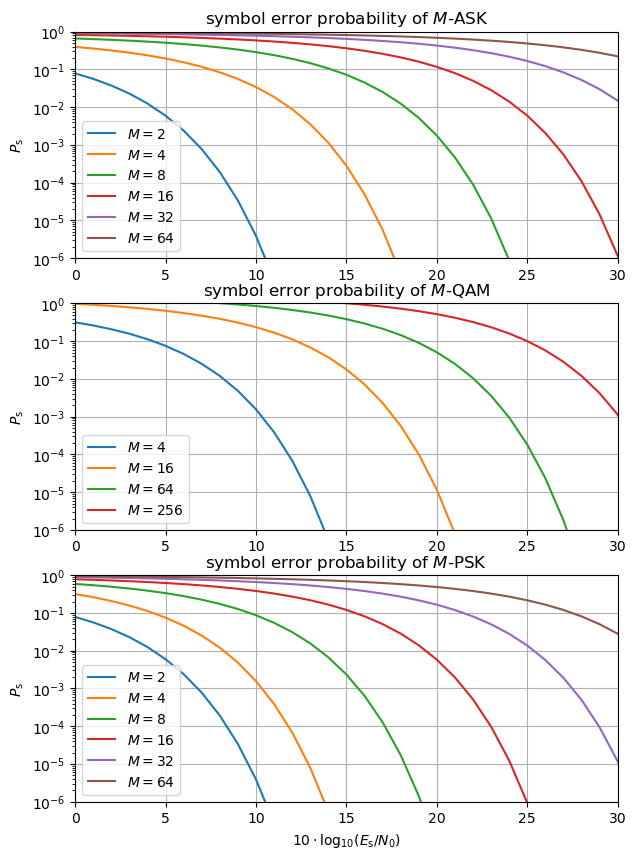

In [2]:
# definiton of signal to noise ratio
SNRdB = np.linspace(-10,40,51)
SNR = 10**(SNRdB/10)

# symbol error rates (SER) of ASK
M_ASK = np.array([2,4,8,16,32,64])
m_ASK = np.log2(M_ASK)
Mv,SNRv = np.meshgrid(M_ASK,SNR)
SER_ASK = (Mv-1)/Mv * erfc(np.sqrt(3.0/(Mv**2-1) * SNRv))

# symbol error rates (SER) of QAM
M_QAM = np.array([4,16,64,256])
m_QAM = np.log2(M_QAM)
Mv,SNRv = np.meshgrid(M_QAM,SNR)
SER_QAM = 2*(np.sqrt(Mv)-1)/np.sqrt(Mv) * erfc(np.sqrt(3.0/(2*(Mv-1)) * SNRv))

# symbol error rates (SER) of PSK
M_PSK = np.array([2,4,8,16,32,64])
m_PSK = np.log2(M_PSK)
SER_PSK = erfc(np.sqrt(np.outer(SNR,np.sin(np.pi/M_PSK)**2)))
# exact solution for M=2 (BPSK)
SER_PSK[:,0] = SER_PSK[:,0] / 2.0

fig2 = plt.figure(figsize=(7,10))
ax2a = fig2.add_subplot(311)
for run,cntr in zip(M_ASK,range(len(M_ASK))):
    ax2a.semilogy(SNRdB, SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-ASK')
plt.legend()

ax2b = fig2.add_subplot(312)
for run,cntr in zip(M_QAM,range(len(M_QAM))):
    ax2b.semilogy(SNRdB, SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-QAM')
plt.legend()

ax2c = fig2.add_subplot(313)
for run,cntr in zip(M_PSK,range(len(M_PSK))):
    ax2c.semilogy(SNRdB, SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
plt.xlabel('$10 \cdot \log_{10}(E_{\mathrm{s}}/N_0)$')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-PSK')
plt.legend()

## Symbol Error Probability versus Energy Efficiency

The average energy $E_{\mathrm{s}}$ per data symbol is related to the average energy $E_{\mathrm{b}}$ per information bit by $E_{\mathrm{s}}=m \cdot E_{\mathrm{b}}$ with $m$ being the number of bits per symbol. The corresponding signal-to-noise ratio becomes

\begin{equation}
    \frac{E_{\mathrm s}}{N_0} = m \cdot \frac{E_{\mathrm b}}{N_0}
    \quad \Rightarrow \quad
    10 \cdot \log_{10} \frac{E_{\mathrm s}}{N_0} 
    = 10 \cdot \log_{10} m + 10 \cdot \log_{10} \frac{E_{\mathrm b}}{N_0} .
\end{equation}

We see that the error rate curves are horizontally shifted by a fixed value $10 \cdot \log_{10} m$ depending on the spectral efficiency of the modulation scheme. This type of representation is particularly interesting for information theory because it uses the energy efficiency $\frac{E_{\mathrm b}}{N_0}$ instead of the physical SNR $\frac{E_{\mathrm s}}{N_0}$. The corresponding curves are illustrated below.

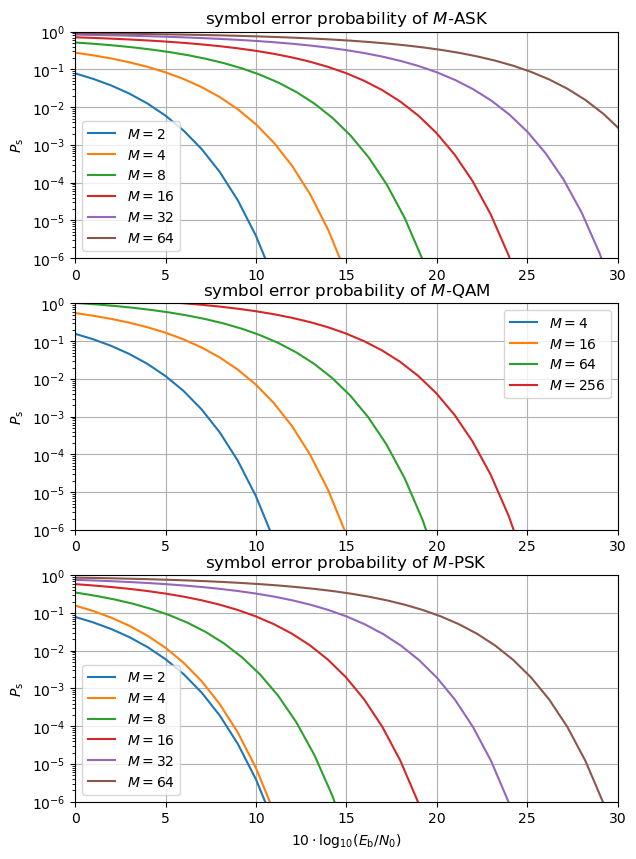

In [4]:
fig3 = plt.figure(figsize=(7,10))
ax3a = fig3.add_subplot(311)
for run,cntr in zip(M_ASK,range(len(M_ASK))):
    ax3a.semilogy(SNRdB-10*np.log10(m_ASK[cntr]), SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-ASK')
plt.legend()

ax3b = fig3.add_subplot(312)
for run,cntr in zip(M_QAM,range(len(M_QAM))):
    ax3b.semilogy(SNRdB-10*np.log10(m_QAM[cntr]), SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-QAM')
plt.legend()

ax3c = fig3.add_subplot(313)
for run,cntr in zip(M_PSK,range(len(M_PSK))):
    ax3c.semilogy(SNRdB-10*np.log10(m_PSK[cntr]), SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
plt.xlabel('$10 \cdot \log_{10}(E_{\mathrm{b}}/N_0)$')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-PSK')
plt.legend()

## Mutual Information as Function of SNR

In information theory, the mutual information is of major importance. For continuously distributed noise, differential entropies $h({\cal Y}$ have to be used. The mutual information is defined as the difference of two differential entropies

\begin{align}
    I({\cal X};{\cal Y}) &= h({\cal Y}) - h({\cal Y} \mid {\cal X}) \; .
\end{align}

The term $h({\cal Y} \mid {\cal X})$ denotes the differential entropy of the noise $h({\cal W})$ and is constant for given noise power. For digital modulation schemes with discrete alphabets from ASK, QAM or PSK the mutual information cannot be expressed by simple analytic expressions because the computation of $h({\cal Y)$ includes the logarithm of

\begin{align}
    p(y) = \sum_{x \in \mathbb{X}} p(y \mid x) \cdot \Pr \{ x\} .
\end{align}

The sum inside the logarithm cannot be simplified and the mutual information

\begin{align}
    I({\cal X};{\cal Y}) 
    = \sum_{x \in \mathbb{X}} \Pr\{ x \} \cdot 
      \int_{-\infty}^{\infty} p(y \mid x) \cdot \log_2 \frac{p(y \mid x)}{p(y)} \ dy
\end{align}

can only be determined by numerical integration. The mutual information's unit is bit/s/Hz. Hence, it describes a data rate normalized on the minimum required bandwidth. The mutual information is also called spectral efficiency.

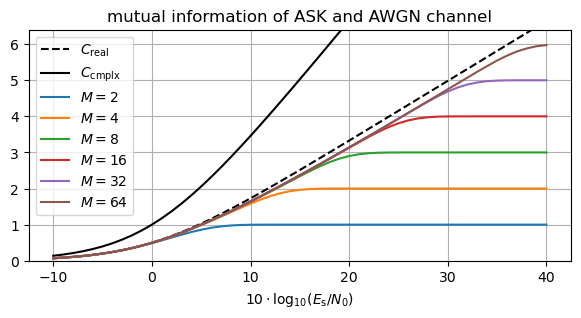

In [5]:
from info_theory import mi_awgn

Cgauss_real = 0.5 * np.log2(1+SNR)
Cgauss_cmplx = np.log2(1+SNR)

# ASK
I_ASK = np.zeros((len(SNRdB),len(M_ASK)))
for M,cntr in zip(M_ASK,range(len(M_ASK))):
    ASK = (M-1-2*np.arange(M), np.ones(M)/M)
    I_ASK[:,cntr] = mi_awgn(ASK[0],ASK[1],SNRdB,100)
    
fig4 = plt.figure(figsize=(7,3))
ax4a = fig4.add_subplot(111)
ax4a.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax4a.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
for run,cntr in zip(M_ASK,range(len(M_ASK))):
    ax4a.plot(SNRdB, I_ASK[:,cntr], '-',label='$M=$%g' %(run))
plt.ylim(0,6.4)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('mutual information of ASK and AWGN channel')
plt.grid()


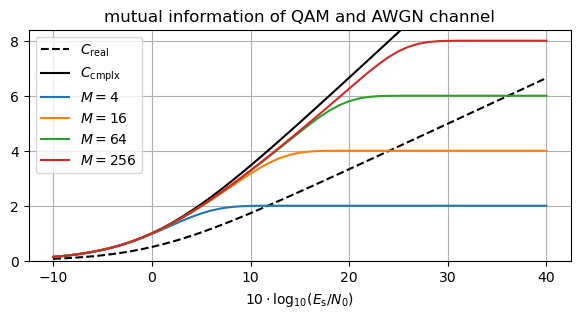

In [6]:
# QAM
I_QAM = np.zeros((len(SNRdB),len(M_QAM)))
for M,cntr in zip(M_QAM,range(len(M_QAM))):
    sqrtM = np.sqrt(M)
    ASK = sqrtM-1-2*np.arange(sqrtM)
    QAM = np.meshgrid(ASK,ASK)
    QAM = ((QAM[0] + 1j*QAM[1]).flatten(), np.ones(M)/M)
    I_QAM[:,cntr] = mi_awgn(QAM[0],QAM[1],SNRdB,100)
    
fig5 = plt.figure(figsize=(7,3))
ax5a = fig5.add_subplot(111)
ax5a.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax5a.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
for run,cntr in zip(M_QAM,range(len(M_QAM))):
    ax5a.plot(SNRdB, I_QAM[:,cntr], '-',label='$M=$%g' %(run))
plt.ylim(0,8.4)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('mutual information of QAM and AWGN channel')
plt.grid()

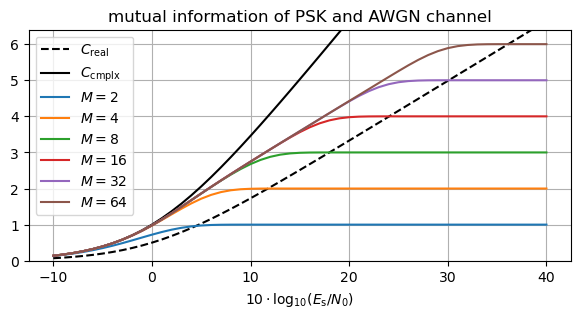

In [7]:
# PSK
I_PSK = np.zeros((len(SNRdB),len(M_PSK)))
for M,cntr in zip(M_PSK,range(len(M_PSK))):
    PSK = (np.exp(1j*2.0*np.pi*np.arange(M)/M), np.ones(M)/M)
    I_PSK[:,cntr] = mi_awgn(PSK[0],PSK[1],SNRdB,100)
    
fig6 = plt.figure(figsize=(7,3))
ax6a = fig6.add_subplot(111)
ax6a.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax6a.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
for run,cntr in zip(M_PSK,range(len(M_PSK))):
    ax6a.plot(SNRdB, I_PSK[:,cntr], '-',label='$M=$%g' %(run))
plt.ylim(0,6.4)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('mutual information of PSK and AWGN channel')
plt.grid()

## Error Probability as Function of Mutual Information

The figure below depicts the error rates as a function of the mutual information for linear modulation schemes and various cardinalities. Both are connected via the SNRs. We observe that lowerror probabilities below $10^{-3}$ require a mutual information very close to the maximum value. For instance, 4-QAM mit $m=2$ bit/symbol require $I({\cal X};{\cal Y}) \approx m=2$ bit/s/Hz for achieving an error rate below $10^{-3}$. Already small deviations from $I({\cal X};{\cal Y}$ to $m$ lead to rather high error probabilities for uncoded transmission. 

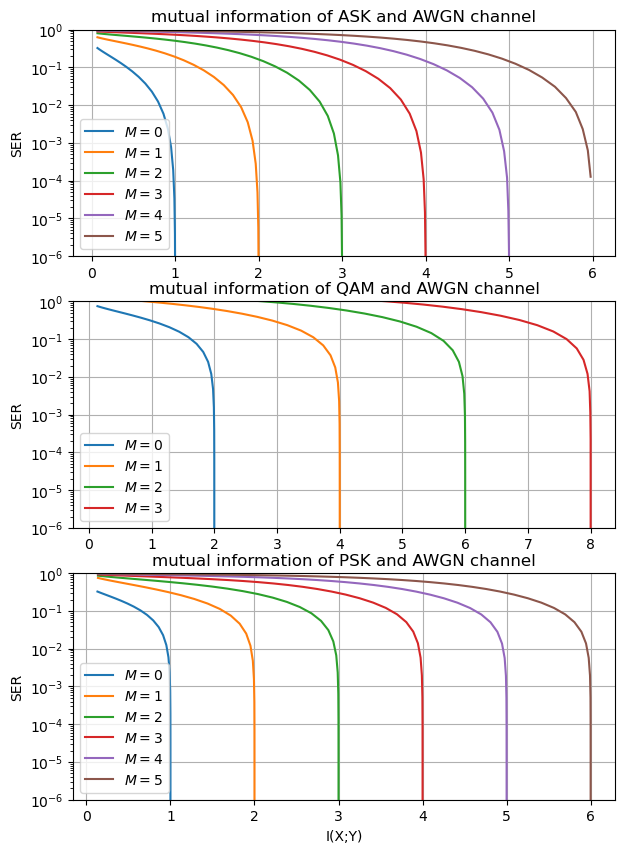

In [8]:
fig7 = plt.figure(figsize=(7,10))
ax7a = fig7.add_subplot(311)
for run in range(len(M_ASK)):
    ax7a.semilogy(I_ASK[:,run], SER_ASK[:,run], '-', label='$M=$%g' %(run))
plt.ylim(1e-6,1)
plt.legend()
#plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('mutual information of ASK and AWGN channel')
plt.grid()

ax7b = fig7.add_subplot(312)
for run in range(len(M_QAM)):
    ax7b.semilogy(I_QAM[:,run], SER_QAM[:,run], '-', label='$M=$%g' %(run))
plt.ylim(1e-6,1)
plt.legend()
#plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('mutual information of QAM and AWGN channel')
plt.grid()

ax7c = fig7.add_subplot(313)
for run in range(len(M_PSK)):
    ax7c.semilogy(I_PSK[:,run], SER_PSK[:,run], '-', label='$M=$%g' %(run))
plt.ylim(1e-6,1)
plt.legend()
plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('mutual information of PSK and AWGN channel')
plt.grid()